## The Subliminal Wolf
#### Peter Dresslar
##### CAS543 Complexity Economics

*Based in part on a course notebook supplied by J. Applegate.*

This week, one of our readings was _The Subliminal Man_, a short story by J. G. Ballard. In that book, we are treated to a vision of a dystopic future society. The protagonist, Hathaway finds himself beset by endless advertisements that seem to come literally through the air to persuade every member of society to purchase more and more of everything. The messages are so pervasive and effective that the people in Hathaway's life don't even realize that they are losing control. 

In other words, think *Invasion of the Body Snatchers*, except Donald Sutherland just really hates banner ads.

The subtext of _The Subliminal Man_ is that decisions about economic interactions---economic agency---is in danger of being completely subverted from individuals by the nefarious forces of corporations and a corrupt, consumerist society.

<p align="center">&#x2022;&nbsp;&nbsp;&nbsp;&#x2022;&nbsp;&nbsp;&nbsp;&#x2022;</p>

We also, this week, received an unrelated (seemingly so, anyway!) practice Python code notebook titled, BoundedSystems. That notebook featured a model system centered on the dynamics of two separate classes sharing the same domain: wolves, and sheep. The system is comprised of paired equations that operate on the populations of the respective predator and prey, with the resulting system evoking the form of the Lotka-Volterra Model. The following cell contains the description of the Lotka-Voltera Model, quoted directly from the BoundedSystems notebook:



> #### The Lotka-Volterra Model
> is a pair of first order, non-linear, differential equations often used to describe the dynamics of biological systems in which two species interact, one a predator and the other its prey. The model was proposed independently by Alfred J. Lotka in 1925 and
> Vito Volterra in 1926. Considering sheep as the prey and wolves as the predators,  
>  let $s$ = number of sheep  
>  $w$ is number of wolves  
>  $\alpha$ is natural growth rate of sheep  
>  $\beta$ is death rate of sheep due to wolf predation  
>  $\gamma$ is natural death rate of wolves  
>  $\delta$ is how many sheep eaten creates a new wolf.   
> The system of equations is
$$\frac{ds}{dt} = \alpha s - \beta s w$$
$$\frac{dw}{dt} = -\gamma w + \delta \beta s w$$

> and $x$ is the state vector $[s, w]$ giving sheep and wolf populations.  (1)



As I mulled our reading list, I was struck by a surprising connection between the story and the model. The model is built with smooth continuous functions describing the growth and retreat of wolf populations. The reason the model can describe these phenomena with perfect predictable curves is: the sheep and wolves in the model, as in real life, have no meaningful economic agency. 

The wolf does not *choose* to eat a sheep. It does not consider whether losing another sheep today might tip the balance of the ecosystem and lead to eventual extinction. If there's a sheep in front of the wolf, the wolf will just try to get it. Again, wolves effectively have no agency in terms of consumption decisions.

When we think about it, this is quite similar to the future that Ballard presages. When he writes: "We've no real freedom of choice, anyway," Ballard is describing a situation where individuals have lost their agency over what they purchase. Or, put another way, they have agency, but the force controlling that agency always tilts the shopping purchases toward "buy." 

Ballard's consumers are Lotka-Volterra wolves.

<p align="center">🐺 🐺 🐺</p>

Since this discussion is rooted in the domain of complexity economics, it seems like a useful experiment to give our wolves their Ballardian behavior.

The wolves have choices about what they eat, except that mutton is the only thing on the menu. And, they are effectively infinitely hungry. Of course, we realize that this is not fully representative in the real world: there are limits to how much sheep meat wolves can fit into their fluffy, rumbly tummies. 

However, in a model (as opposed to the continuous functions in equations) we must have some kind of quantization, some kind of stepping function to generate an outcome. So, for our model, we can suppose that it is always dinner time: the steps correspond to how long it takes for a wolf to get hungry after a meal. It's an arbitrary call, but actually serves to nudge our computer program a bit toward reality.

For starters, we can simply apply the same general population functions as we saw in our Lotka-Volterra model. All the systemic variables should work the same way, though the model parameter $\beta$ now turns into a very simple proxy for "here's how often a wolf can get sheep." 

With this approach, instead of computing the whole timespan at once, we *process cause and effect from start to finish*.

ds_dt: 0.00, dw_dt: 60.00
s_current: 100.00, w_current: 10.00, s_next: 100.00, w_next: 10.01
ds_dt: -0.98, dw_dt: -30.09
s_current: 0.89, w_current: 21.00, s_next: 0.89, w_next: 20.99
ds_dt: 0.84, dw_dt: -3.43
s_current: 1.10, w_current: 2.42, s_next: 1.10, w_next: 2.42
ds_dt: 4.10, dw_dt: -0.39
s_current: 4.24, w_current: 0.33, s_next: 4.24, w_next: 0.33
ds_dt: 18.31, dw_dt: -0.01
s_current: 18.50, w_current: 0.10, s_next: 18.51, w_next: 0.10
ds_dt: 69.51, dw_dt: 5.62
s_current: 79.51, w_current: 1.26, s_next: 79.52, w_next: 1.26
ds_dt: -4.64, dw_dt: -49.40
s_current: 1.77, w_current: 36.14, s_next: 1.77, w_next: 36.13
ds_dt: 0.49, dw_dt: -6.03
s_current: 0.85, w_current: 4.20, s_next: 0.85, w_next: 4.20
ds_dt: 2.76, dw_dt: -0.68
s_current: 2.92, w_current: 0.53, s_next: 2.92, w_next: 0.53
ds_dt: 12.43, dw_dt: -0.07
s_current: 12.58, w_current: 0.12, s_next: 12.58, w_next: 0.12
ds_dt: 53.46, dw_dt: 0.84
s_current: 55.21, w_current: 0.32, s_next: 55.22, w_next: 0.32
ds_dt: -36.23, dw_d

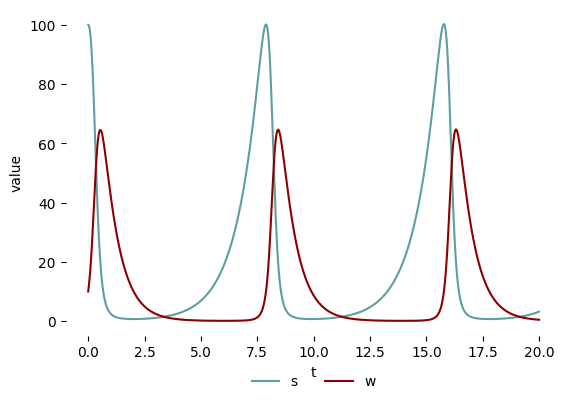

In [39]:
# subliminal wolf model, v0.1.0

import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# Same params from the BoundedSystems notebook, except that beta is now a function of wolf "decisions".
alpha = 1
beta = 0.1
gamma = 1.5
delta = .75

# throttle is a simple log output variable. increase to see more text output in the notebook. zero it to turn off.
throttle = 7500

# Now instead of a continuous function, we'll have a step function, effectively Eulerizing the Lotka-Volterra system.
# It's super interesting to think of models as Eulerizing the continuous functioning of our real world. Note I am not totally sure Eulerizing is a word.

def process_step(x, dt, x_0):
    # unpacking our sheep and wolves from x
    s, w = x

    # now we can process one transition (a Euler step) of our Lotka-Volterra system.
    ds_dt = alpha * s - beta * s * w
    dw_dt = -gamma * w + delta * beta * s * w

    if throttle > 0 and i % throttle == 0:
        print(f"ds_dt: {ds_dt:.2f}, dw_dt: {dw_dt:.2f}")  # See the rates of change, default off.

    # and then we need to set the next state vector, remembering that we cannot have negative populations
    s_1 = max(0, s + ds_dt * dt)
    w_1 = max(0, w + dw_dt * dt)

    return(s_1, w_1)


# 100 sheep, 10 wolves.
x_0 = [100, 10]

# time is the total time period we want to simulate.
time = 20
# dt is our time step size. dt = "dinnertime" :-)
dt = .0002
# dividing the two give us a time vector
t = int(time / dt)

# note that adjusting dt has very interesting phase effects on the model. the default setting is
# 100 times more "granular" than the BoundedSystems notebook.

# Now, instead of integrating:
### x = odeint(dx_dt, x_0, t)
# We start by initializing the state vector.
x = x_0 

# since we have steps, we need stores for our vectors
# (i am SURE there is a more pandas way to do this, but something, vectors in a multidimensional system running over time, something)
s_store = [x_0[0]]
w_store = [x_0[1]]
t_store = [0]

# And then we iterate over steps in a Euler loop
for i in range(t):
    s_current = s_store[-1] # reference the last value in the store
    w_current = w_store[-1]

    s_next, w_next = process_step(x, dt, x_0)

    # now we need to update our state vector
    x = [s_next, w_next]

    if throttle > 0 and i % throttle == 0:
        print(f"s_current: {s_current:.2f}, w_current: {w_current:.2f}, s_next: {s_next:.2f}, w_next: {w_next:.2f}")

    s_store.append(s_next)
    w_store.append(w_next)
    t_store.append(t_store[-1] + dt)

# we can convert the vecs to a dataframe so that we can use the graphics from our BoundedSystems notebook
xdf = pd.DataFrame({'s': s_store, 'w': w_store, 't': t_store})

# and now we can plot the results
# please note that all plotting herein is from the BoundedSystems notebook.
sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)

plt.subplots_adjust(bottom=0.2)  # Increases bottom margin
#plt.savefig('hungry-like-a-wolf_LVtimeseries.pdf')

Let's take a step back. For those who are in our class and have completed the BoundedSystems assignment, the curves above immediately look familiar. (Just in case, I'll point out that the assignment was to toggle beta to .5: you'll need to switch back to .1 for the plot above to make sense.)

Here's a snapshot of the original notebook assignment for those who are not in the class and are just reading this far because they like math (or wolves, or Ballard):

<img src="https://raw.githubusercontent.com/peterdresslar/the-subliminal-wolf/main/output1.png" width="250">

Seems like the same graph! However, when we compare the two, we are looking at curves that are in reality totally different from one another. Our plot from the code above is built step by step rather than from the smooth continuous functions. Recognizing base concepts you might remember from calculus class can be pretty satisfying, yes?

<p align="center">🐺 🐺 🐺</p>

Let's take our approach a bit further. Thinking back to our Ballard story one more time, I want to explore a little bit more about the connection between those consumers and the wolves? Well, the funny thing about the wolves and sheep model above is that even though there is no real choosing going on, no money, and no pricing function, there _is_ a cost for the wolves. The next sheep they eat is one sheep closer to their extinction. They just don't know, or don't care about the cost: they are _insensitive_ to it. Just like Ballard's consumers:

> BUY NOW BUY NOW BUY NOW BUY NOW BUY NOW
> NEW CAR NOW NEW CAR NOW NEW CAR NOW
> YES YES YES YES YES YES YES YES YES YES YES

(That's an actual quote from the story.)

<p align="center">&#x2022;&nbsp;&nbsp;&nbsp;&#x2022;&nbsp;&nbsp;&nbsp;&#x2022;</p>

Let's take another look at our new step-by-step model. What if we adjust the code so that there is a costing function---sort of a pseudo-price that is based on sheep scarcity? After all, the cost of the next sheep is more or less exactly how many steps losing that sheep takes the wolf toward the grave.

Let's think it through in an adjusted version of our new model.

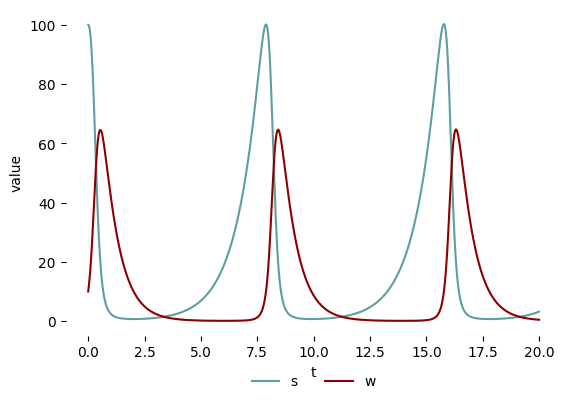

In [40]:
# subliminal wolf model, v0.1.1

import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# Same params
alpha = 1
beta0 = None # except, beta is going to get a little more complex.
gamma = 1.5
delta = .75

# throttle is a simple log output variable.
throttle = 0

# wolves eat every sheep they can. doesn't matter how many there are.
# let's call this sheep-eatiness theta=1.

theta = 1.0

# of course, wolves have a baseline ability to catch and eat sheep, which was neatly captured in our continuous function by beta.
# however, me might assert that that version of beta seems simple because the wolf is completely insensitive to the number of sheep.
# we can reasonably work with an equation that says that wolves will have sensitivity theta to the number of sheep,
# and that sensitivity combines with a base ability (beta0) to create a new beta.

# to create a sheep scarcity factor, let's do some fiddling with our initial number of wolves and sheep (otherwise things could be nonsensical).
# the output of the function will be a "produced" beta.

def process_beta(x, theta, x_0):
    # again let's unpack our sheep and wolves from x
    s, w = x
    # and let's unpack our initial number of sheep and wolves from x_0
    s_0, w_0 = x_0
    # let's go ahead and set our base ability to eat sheep, just like before
    beta0 = 0.1
    # and now let's set a cost function that will make sheep eating more expensive as the number of sheep decreases (relatively)
    k = 1 # a base cost
    eps = 1e-6 # a small number to avoid division by zero
    # the following is a mangled inverted price elasticity of supply function from Khan Academy.
    # cursor then helped me fix the division by zero errors. not a proud set of moments.
    p = k * (s_0 / (s + eps)) # the cost
    # and then we see how this cost changes the beta
    # except, with wolves, theta is one, and they totally ignore the cost. 
    beta = beta0 * (1 / (1 + (1-theta) * p))

    # if you set theta between 0 and 1, wolves will start to care about the cost.
    # note that if you set theta to 0, beta will be 0.

    return beta

def process_step(x, dt, x_0):
    # unpacking our sheep and wolves from x
    s, w = x

    # time to check our beta
    beta = process_beta(x, theta, x_0)

    # now we can process one transition (a Euler step) of our Lotka-Volterra system.
    ds_dt = alpha * s - beta * s * w
    dw_dt = -gamma * w + delta * beta * s * w

    if throttle > 0 and i % throttle == 0:
        print(f"ds_dt: {ds_dt:.2f}, dw_dt: {dw_dt:.2f}")  # See the rates of change, default off.

    # and then we need to set the next state vector, remembering that we cannot have negative populations
    s_1 = max(0, s + ds_dt * dt)
    w_1 = max(0, w + dw_dt * dt)

    return(s_1, w_1)

# everything is the same as before!

# 100 sheep, 10 wolves.
x_0 = [100, 10]

# time is the total time period we want to simulate.
time = 20
# dinnertime
dt = .0002
# dividing the two give us a time vector
t = int(time / dt)

# state vec init
x = x_0 

# since we have steps, we need stores for our vectors
s_store = [x_0[0]]
w_store = [x_0[1]]
t_store = [0]

# And then we iterate over steps in a Euler loop
for i in range(t):
    s_current = s_store[-1] # reference the last value in the store
    w_current = w_store[-1]

    s_next, w_next = process_step(x, dt, x_0)

    # now we need to update our state vector
    x = [s_next, w_next]

    if throttle > 0 and i % throttle == 0:
        print(f"s_current: {s_current:.2f}, w_current: {w_current:.2f}, s_next: {s_next:.2f}, w_next: {w_next:.2f}")

    s_store.append(s_next)
    w_store.append(w_next)
    t_store.append(t_store[-1] + dt)

# we can convert the vecs to a dataframe so that we can use the graphics from our BoundedSystems notebook
xdf = pd.DataFrame({'s': s_store, 'w': w_store, 't': t_store})

# and now we can plot the results
sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)

plt.subplots_adjust(bottom=0.2)  # Increases bottom margin
#plt.savefig('hungry-like-a-wolf_OR_AM_I_LVtimeseries.pdf')


It's the same plot, right? But really, it isn't. With this version, there's a cost buried in the numbers, and the cost is being completely and egregiously borne by the wolves of each generation (to say nothing of the sheep!) 

Here are some thoughts:

1. When people are persuaded to purchase things we might say that they are specifically persuaded to ignore the cost. To become insensitive to the cost.

2. I used the theta for a reason. Theta sort of *is* motive. It's a really interesting variable. (I guess, anyway: there's a whole class ahead of us.)

3. The ecological parallel is pretty obvious, and maybe the single most profound connection between rampant consumerism and out-of-control predation. Either way, I suppose the grass grows back in the end.

The outcomes above are a bit of a downer, so let's close on something a bit more optimistic. Let's think about the power of choice! Or, at least, the power of cost sensitivity.

The next version of the model isn't really a version at all: we simply set $\theta$ (theta, for sensitivity) to a more moderate value: 0.5. According to our formulas, this should cause the wolves to predate sheep less and less as they become more scare, and vice-versa. The result is a system in which some order---an equilibrium, of sorts---appears:

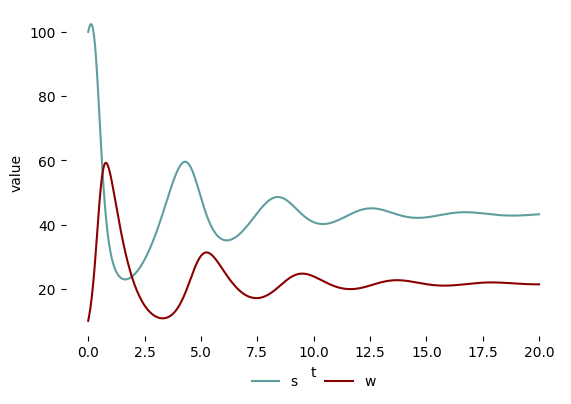

In [41]:
# subliminal wolf model, v0.1.1a

# Same setup but with price-sensitive wolves
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# Same params but with theta = 0.5 for price-sensitive wolves
alpha = 1
gamma = 1.5
delta = .75
theta = 0.5  # Wolves now consider costs!

# time parameters
time = 20
dt = time / 1000
t = int(time / dt)

# Initial populations
x_0 = [100, 10]

# Initialize stores
s_store = [x_0[0]]
w_store = [x_0[1]]
t_store = [0]

# Simulate with individual wolves
x = x_0
for i in range(t):
    s_current = s_store[-1]
    w_current = w_store[-1]
    
    s_next, w_next = process_step([s_current, w_current], dt, x_0)
    
    s_store.append(s_next)
    w_store.append(w_next)
    t_store.append(t_store[-1] + dt)

# Convert to dataframe and plot
xdf = pd.DataFrame({'s': s_store, 'w': w_store, 't': t_store})

# Plot the stabilized system
sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)
plt.subplots_adjust(bottom=0.2)
#plt.savefig('hungry-like-a-clever-wolf_LVtimeseries.pdf')

Now... that's bounded!

<p align="center">🐺 🤖 🐺 🤖 🐺</p>

But, while the chart above does illustrate step-wise model dynamics, it isn't working with individual wolves yet. Instead, the chart above is generated from dynamics of an entire population, summed at each step. So, a question might be: does our model behavior change if we split the populations out into individuals? 

This turned out to be an interesting question. To begin with, we will step back, a moment, from our theta-beta mutability, and just focus on building ten, approximately Lotka-Voltera compliant wolves. (Or *agent* wolves, as we call them here.)

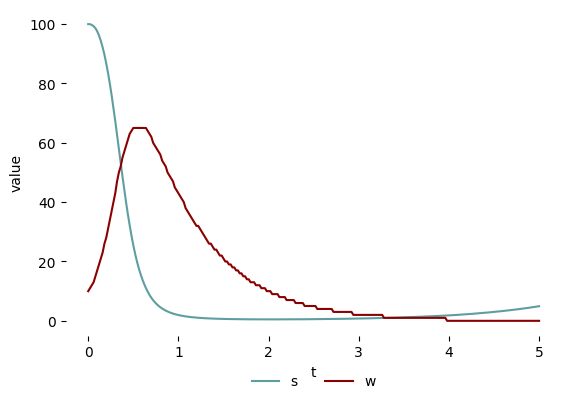

In [42]:
# subliminal wolf ABM: This time, it's personal.
# v0.1.0

import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy.integrate import odeint

throttle = 0 # set to 1 to turn on logging

# Not converting sheep from the ODE for now
model_params = {
    'alpha': 1,
    'beta': 0.1, # we need this at the model level only for the reference ODE
    'gamma': 1.5, # we need this at the model level only for the reference ODE
    'delta': .75, # we need this at the model level only for the reference ODE
    's_start': 100,
    'w_start': 10,
    'dt': .02, 
    's_max': 110,  # an upper bound on sheep, for clarity
    'eps': 0 # will give a dead-dog bounce if nonzero! set to zero if you want "real" last-wolf scenario.
}

model_state = {
    'step_accumulated_ds': None,
    'step_accumulated_dw': None,
    'accumulated_dw_remainder': None,
    's_state': None,
    'agents_w_state': None
}

# time params.
model_time = {
    'tmax': 250, # default changed to 250 from 1000, since the wolves die out quickly
    'time': None # will be computed from tmax and dt
}
    
#############################################################
# Agent Functions
#############################################################
def instanitate_agent_w(model_params):
    return (
        model_params['beta'],
        model_params['gamma'],
        model_params['delta']
    )

def process_agent_step_w(agent_w, model_params, model_state):
    dt = model_params['dt']
    s = model_state['s_state']
    current_step_accumulated_dw = model_state['step_accumulated_dw']
    current_step_accumulated_ds = model_state['step_accumulated_ds']
    w_beta, w_gamma, w_delta = agent_w

    dw_dt = (
        -1
        * w_gamma # gamma
        * 1       # this here wolf
        + w_delta # delta
        * w_beta # beta
        * s       # sheep
        * 1       # this here wolf
        )

    added_dw = dw_dt * dt # scale to dt!
    model_state['step_accumulated_dw'] = added_dw + current_step_accumulated_dw

    ds_dt_one_w_only = - w_beta * s
    model_state['step_accumulated_ds'] = ds_dt_one_w_only * dt + current_step_accumulated_ds

    return model_state
    
#################################################################
# Model Functions
#################################################################
def initialize_agents_w(w_start):
    agents_w = []
    for i in range(w_start):
        agents_w.append(instanitate_agent_w(model_params))
    return agents_w

def reset_accumulators(model_state, t):
    model_state['step_accumulated_dw'] = 0
    model_state['step_accumulated_ds'] = 0
    return model_state

def process_agents_step(model_params, model_state, t):
    agents_w = model_state['agents_w_state']
    for agent_w in agents_w:
        model_state = process_agent_step_w(agent_w, model_params, model_state)

    return model_state

def ODE_accumulate_and_fit(model_params, model_state, t):
    ds_total = model_state['step_accumulated_ds']
    dw_total = model_state['step_accumulated_dw']
    accumulated_dw_remainder = model_state['accumulated_dw_remainder']
    
    eps = model_params['eps']
    dt = model_params['dt']

    dw_total += accumulated_dw_remainder 

    if eps and eps > 0:
        dw_total += eps * dt

    new_s = model_state['s_state'] + ds_total
    new_s_or_zero = max(0, new_s)  
    new_s_or_max = min(new_s_or_zero, model_params['s_max'])
    model_state['s_state'] = new_s_or_max

    agents_w = model_state['agents_w_state']
    net_agents_w_change = int(dw_total) 
    print_if_throttle(f"net_agents_w_change: {net_agents_w_change}", t)
    new_remainder = dw_total - net_agents_w_change
    print_if_throttle(f"accumulated_dw_remainder: {accumulated_dw_remainder}", t)
    if net_agents_w_change > 0:
        for _ in range(net_agents_w_change):
            agents_w.append(instanitate_agent_w(model_params))
    elif net_agents_w_change < 0:
        remove_count = min(len(agents_w), abs(net_agents_w_change))
        for _ in range(remove_count):
            agents_w.pop()

    model_state['agents_w_state'] = agents_w
    model_state['accumulated_dw_remainder'] = new_remainder

    return model_state

def process_s_euler_forward(model_params, model_state, t):
    alpha = model_params['alpha']
    s = model_state['s_state']
    ds_dt = (
        (
            alpha    
            * s        
        )
    )
    new_s = max(0, s + ds_dt * model_params['dt'])
    model_state['s_state'] = new_s
    return model_state

def process_model_step(model_params, model_state, t):
    model_state = reset_accumulators(model_state, t)
    model_state = process_agents_step(model_params, model_state, t)
    model_state = ODE_accumulate_and_fit(model_params, model_state, t)
    model_state = process_s_euler_forward(model_params, model_state, t)
    return model_state

#################################################################
# Utility Functions
#################################################################
def dx_dt(x, t, alpha, beta, gamma, delta):
    s, w = x
    ds_dt = alpha * s - beta * s * w
    dw_dt = -gamma * w + delta * beta * s * w
    return [ds_dt, dw_dt]

def get_reference_ODE(model_params, model_time):
    alpha = model_params['alpha']
    beta = model_params['beta']
    gamma = model_params['gamma']
    delta = model_params['delta']
    
    t_end = model_time['time']
    times = np.linspace(0, t_end, model_time['tmax'])
    x0 = [model_params['s_start'], model_params['w_start']]

    integration = odeint(dx_dt, x0, times, args=(alpha, beta, gamma, delta)) # via cursor, verify this
    ode_df = pd.DataFrame({
        't': times,
        's': integration[:,0],
        'w': integration[:,1]
    })
    return ode_df

def print_if_throttle(stmt, t):
    if throttle == 0:
        return
    if t < 10:
        print(stmt)
        return
    log10_t = int(np.log10(t))
    if t % (10 ** log10_t) == 0:
        print(stmt)
    return

#################################################################
# The Model
#################################################################   

def run_agent_based_model(model_params, model_state, model_time):
    model_time['time'] = model_time['tmax'] * model_params['dt']

    model_state = {
        's_state': model_params['s_start'],
        'agents_w_state': initialize_agents_w(model_params['w_start']),
        'step_accumulated_dw': 0,
        'step_accumulated_ds': 0,
        'accumulated_dw_remainder': 0
    }
    dt = model_params['dt']

    s_store = [model_params['s_start']]
    agents_w_store = []
    agents_w_store = [model_state['agents_w_state'][:]]
    t_store = [0]

    reference_ODE = get_reference_ODE(model_params, model_time)

    for t in range(model_time['tmax']):
        print_if_throttle(f'step {t}', t)
        print_if_throttle(f's: {model_state["s_state"]}', t)
        print_if_throttle(f'agents_w count: {len(model_state["agents_w_state"])}', t)

        model_state = process_model_step(model_params, model_state, t)
    
        s_store.append(model_state['s_state'])
        agents_w_store.append(model_state['agents_w_state'][:])
        t_store.append(t_store[-1] + dt)

        print_if_throttle(f"reference ODE: {reference_ODE.loc[t, ['s', 'w']]}", t)

    xdf = pd.DataFrame({
        's': s_store, 
        'w': [len(agent_list) for agent_list in agents_w_store],  
        't': t_store
    })

    return xdf

#################################################################
# Notebook Work
#################################################################

xdf = run_agent_based_model(model_params, model_state, model_time)

sns.lineplot(pd.melt(xdf, id_vars=['t']), x = 't', y = 'value', hue = 'variable', palette=['cadetblue', 'darkred'])
plt.legend(frameon = False, ncol = 2, loc='lower center', bbox_to_anchor=(.5, -.2))
sns.despine(left = True, bottom = True)
plt.subplots_adjust(bottom=0.2)
#plt.savefig('hungry-like-an-agent_LVtimeseries.pdf')


Since this approach processes step-wise actions for each wolf according to its Lotka-Voltera-defined behavior, the curves are a lot "chunkier," but it turns out that they do mimic the integral curves from the original system. There is plenty we could do from this model to change the outcomes; for staters we could re-introduce our *theta* impacts on *beta* from our last system, and toy with the settings easily enough. But, in truth, this model likely has more fidelity to the way things work in the real world. Wolves are insensitive.

And, the wolves are all dead. There is no half-a-wolf that lives. It turns out that the subliminal wolf is condemned to extinction, unless it begins to behave in a way that takes into account the world around it. 

<p align="center">👤</p>

Ballard published *The Subliminal Man* in 1963. Here we are in 2025.

Somehow his story, brimming with hyperbole as it is, has in many ways been surpassed. Vectors of transmission based on giant towers turned out to be child's play compared to the vast power of a dopamine-generating device everyone carries everywhere in their pockets. Instead of selling us ridiculous iterations of toasters and cars, these devices sell us semi-theoretical financial instruments, party-approved religious tracts, and arbitrage on the data that we ourselves have generated. Most all of us would happily trade this condition for a new fridge every six months.

It isn't that our culture is *drowning* in consumer messaging---instead, each atomic building block of society now features a new fundamental particle called "sponsored content."

And, sure enough, the sheep are disappearing. (Actually, the sheep are probably fine, but there are plenty of species that are vanishing into the zero-like foam at the bottom margins of our charts.)

Yet as we consider our seemingly crushing position today, maybe we can take a lesson from our wolves. Sure, we can consider any number of systemic changes: advertising restrictions, consumer constraints, bans on unfavorable goods or services. We can divest or revest or whatever to TikTok. But in the end, the only thing that reliably saves our wolves from their peril is for the wolves themselves to wake up, to observe, and to change their behavior. For themselves, by themselves.

On that note, I'd like to close by mentioning how enthusiastic I am about the potential of complexity economics---of first-rate simulations grounded by milennia of ordered observations, unleashed by magic-like technology---to at least light us telltales in the right directions.


#### References

Applegate, J. M. (2025?). "BoundedSystems." Course materials for CSE 543: Complexity Economics, Arizona State University, Spring 2024.

Ballard, J. G. (1963). "The Subliminal Man." *New Worlds Science Fiction*, 40(141), pp. 109-126.

Khan Academy (2024). "Introduction to Price Elasticity of Supply." AP Microeconomics Unit 2: Supply, Demand, and Market Equilibrium. Retrieved from: https://www.khanacademy.org/economics-finance-domain/ap-microeconomics/unit-2-supply-and-demnd/24/v/introduction-to-price-elasticity-of-supply-ap-microeconomics

Lotka, A. J. (1925). *Elements of Physical Biology*. Williams & Wilkins Company.

Volterra, V. (1926). "Fluctuations in the Abundance of a Species considered Mathematically." *Nature*, 118, pp. 558–560.

Weisstein, Eric W. "Euler Forward Method." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/EulerForwardMethod.html

Some behavior ideas were inspired by the J. M. Applegate model, Emergent Firms Model 1.0.0:

Applegate, J. M. (2018, July 13). “Emergent Firms Model” (Version 1.0.0). CoMSES Computational Model Library. Retrieved from: https://doi.org/10.25937/6t61-qm82

<p align="center">🐑 🐑 🐑</p>

Note: In this set of systems, the sheep are basically grass. It's kind of gross. I'm a vegetarian!
 
I'll endeavor to build a model in the future that gives the sheep something better to work with. There's plenty more individuality and agency left to model. Maybe they could craft grass into anti-wolf armor---if that's what they turn out to prefer. 

Apparently the only limits are processing power and caffeine. We'll see.